In [1]:
import      numpy               as      np
import      matplotlib.pyplot   as      plt
from        lib_Experimentum    import  *
from        Alessandria         import  *

#path dove stanno i dati del fit
now_path        =   '../BRILLOUIN/TDP43/NO_ARS_12_02/analysis/'

### recupero info su dimensionalità
spectra_path = '../BRILLOUIN/TDP43/NO_ARS_12_02/'
spectra_filename    =   'NO_ARS_12_02'
n_rows    =   len(Import_from_Matlab(spectra_filename, spectra_path, var_name = 'y3'))
n_cols  =   len(Import_from_Matlab(spectra_filename, spectra_path, var_name = 'y3')[0])
###
matrix, rows, cols = Initialize_Matrix(0,0,n_rows,n_cols)

Ho inizializzato una matrice 101x83, per un totale di 8383 spettri


In [2]:
#1) Recupero info su posizioni + info su chi è bono e chi no e su VIPA (questo solo per matrix[0][0])

with open(now_path+'xy.txt', 'r') as fin:
    lines = fin.readlines()[1:]

excluded = ()

with open(now_path+'markov_fit.txt', 'r') as fin:
    fit     =   eval(fin.read())
_,_,_, boni = Unpack_Fit(fit)

"""
with open(now_path+'xy_VIPA.txt', 'r') as fin:
    VIPAs = fin.readlines()[1:]

x_VIPA = np.array(VIPAs[0][1:-2].split(), dtype=float)
y_VIPA = np.array(VIPAs[1][1:-2].split(), dtype=float)

matrix[0][0].Recover_VIPA(x_VIPA, y_VIPA)
"""
count = 0
for ii in range(len(rows)):
    for jj in range(len(cols)):
        #print(lines[count],lines[count+1] )
        matrix[ii][jj].Recover_Spectrum(np.array(lines[count][1:-2].split(), dtype=float), np.array(lines[count+1][1:-2].split(), dtype=float))
        
        if (ii,jj) not in boni:
            excluded = excluded +((ii,jj),)

        count = count + 2

print('Ok ho recuperato le informazioni sulle posizioni')

Ok ho recuperato le informazioni sulle posizioni


In [3]:
#2) Acquisico i dati prodotti dal fit markoviano


##################### MARKOVIANO

with open(now_path+'y_markov_fit.txt', 'r') as fin:
    y_fits = fin.readlines()

with open(now_path+'cost_markov.txt', 'r') as fin:
    costi = fin.readlines()

with open(now_path+'markov_fit_params.txt', 'r') as fin:
    lines   =   fin.readlines()

if (len(boni) != len(lines)):
    raise ValueError("Incompatibilità tra lunghezza file parametri ({}) e informazioni fit ({})".format(len(boni), len(lines)))

for (line, y_fit, cost, (ii,jj)) in zip(lines, y_fits, costi,  boni) :
#for (line, cost, (ii,jj)) in zip(lines, costi,   boni) :
    matrix[ii][jj].Recover_Markov_Fit_Params(line)
    matrix[ii][jj].Recover_y_markov_fit(np.array(y_fit[1:-2].split(), dtype = float))
    matrix[ii][jj].Recover_cost_markov(float(cost))

print('Ok ho recuperato le informazioni del Fit Markoviano')



Ok ho recuperato le informazioni del Fit Markoviano


In [8]:
omega_too_high = Whose_Param_Too_High('Omega', 8.2, 'markov', matrix, boni)
print(len(omega_too_high))

(8, 31) ha Omega= 9.18
(21, 4) ha Omega= 9.18
(24, 4) ha Omega= 9.18
(37, 44) ha Omega= 9.18
(44, 62) ha Omega= 8.21
(48, 23) ha Omega= 9.18
(56, 76) ha Omega= 9.18
(61, 35) ha Omega= 9.18
(63, 18) ha Omega= 9.18
(65, 42) ha Omega= 9.18
(65, 68) ha Omega= 9.18
(66, 5) ha Omega= 9.18
(69, 33) ha Omega= 9.18
(71, 35) ha Omega= 9.18
(73, 56) ha Omega= 9.18
15


In [22]:


omega_markov_map, _ = Get_Parameter_Map('markov', 'Omega', matrix, n_rows, n_cols, excluded, 'seismic', 7.3, 7.65, fig = 'omega_markov_map', path=now_path)


Completata Parameter_Map per Omega
Ho trovato 54 elementi saturati


In [13]:
Delta_omega_markov_map, _ = Get_Parameter_Map('markov', 'Omega', matrix, n_rows, n_cols, excluded, 'seismic', 0,0.7, fig = 'Delta_omega_markov_map', path=now_path, Deltas = True)

Completata Parameter_Map per Omega
Ho trovato 54 elementi saturati


In [14]:
gamma_markov_map, _ = Get_Parameter_Map('markov', 'Gamma', matrix, n_rows, n_cols, excluded, 'seismic', 0.1,0.25, fig = 'Gamma_markov_map', path=now_path)

Completata Parameter_Map per Gamma
Ho trovato 54 elementi saturati


In [15]:
Delta_gamma_markov_map, _ = Get_Parameter_Map('markov', 'Gamma', matrix, n_rows, n_cols, excluded, 'seismic', 0,0.05, fig = 'Delta_gamma_markov_map', path=now_path, Deltas = True)

Completata Parameter_Map per Gamma
Ho trovato 54 elementi saturati


(16, 54)


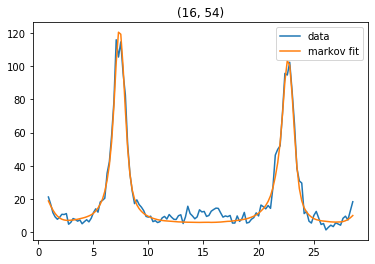

(16, 55)


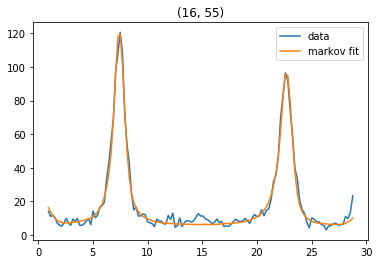

(16, 56)


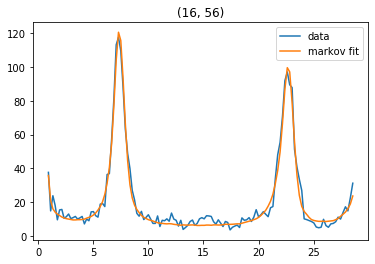

(16, 57)


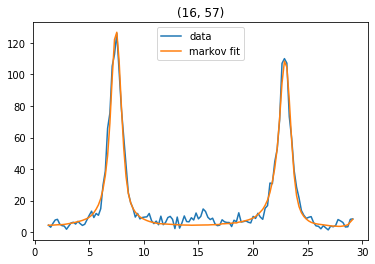

(16, 58)


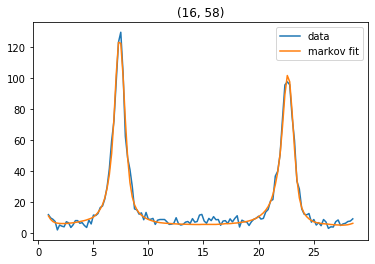

(16, 59)


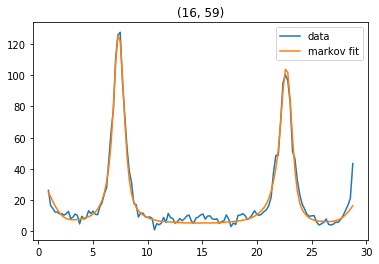

(16, 60)


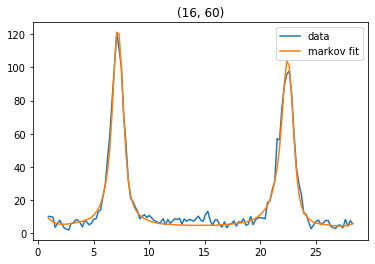

(16, 61)


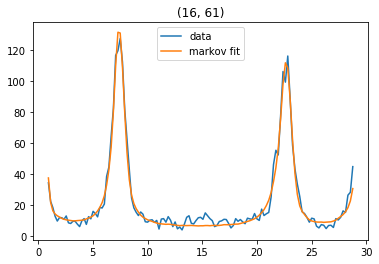

(16, 62)


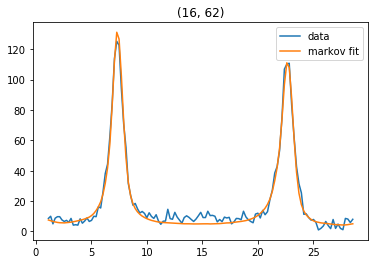

(16, 63)


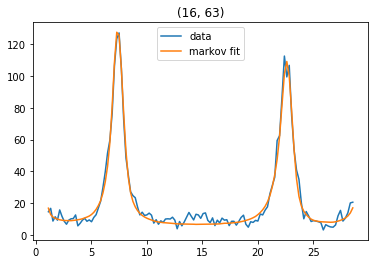

(16, 64)


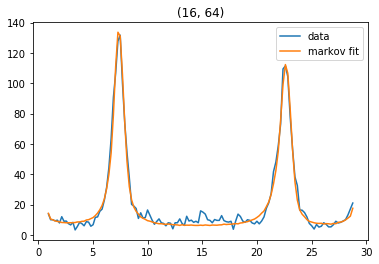

(16, 65)


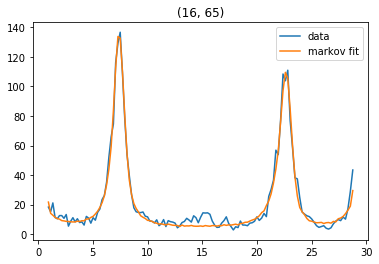

(16, 66)


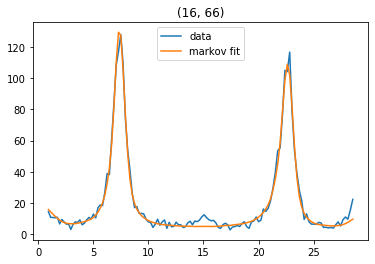

(16, 67)


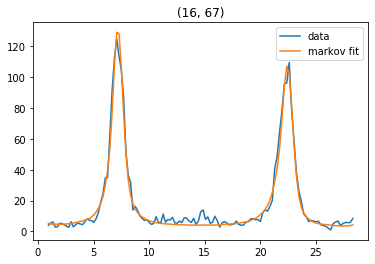

(16, 68)


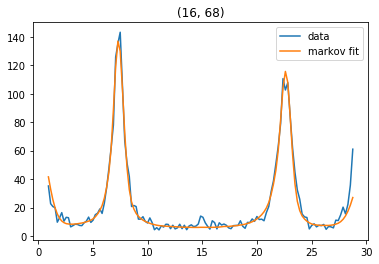

(16, 69)


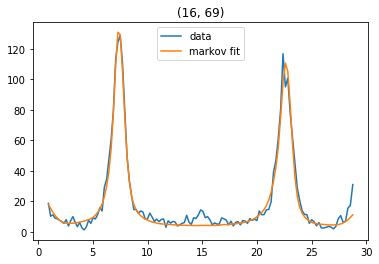

(16, 70)


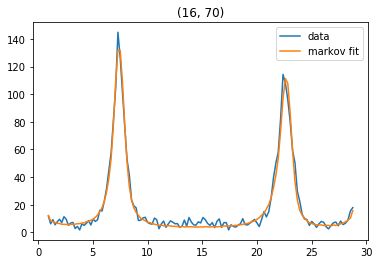

(16, 71)


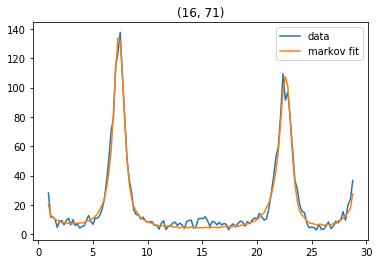

(16, 72)


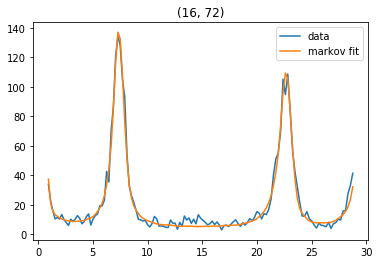

(16, 73)


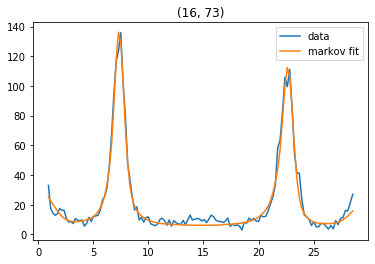

IndexError: tuple index out of range

In [18]:
Plot_Elements_Spectrum(matrix, boni[1450:1470], fit = 'markov')
print(matrix[78][1].Markov_Fit_Params.values[0])

In [13]:
(50,84) in excluded

True

In [8]:
#funz da aggiungere lib_exp
def Whose_Param_Too_High(param, treshold, fit,  matrix, fitted):


    if fit == 'markov':
        attr = 'Markov_Fit_Params'
    elif fit == 'tot':
        attr = 'Tot_Fit_Params'
    else:raise ValueError("Select a type of fit: 'markov' or 'tot' ")
    too_high    =   ()

    for (ii,jj) in (fitted):
        if getattr(matrix[ii][jj],attr)[param]['Values'] > treshold:
            too_high    =   too_high    +   ((ii,jj),)
            print(str((ii,jj))+' ha '+param+'= %3.2f'%(getattr(matrix[ii][jj],attr)[param]['Values']))

    return too_high

def Whose_Param_Too_Low(param, treshold, fit, matrix, fitted):

    if fit == 'markov':
        attr = 'Markov_Fit_Params'
    elif fit == 'tot':
        attr = 'Tot_Fit_Params'
    else:raise ValueError("Select a type of fit: 'markov' or 'tot' ")

    too_low    =   ()

    for (ii,jj) in (fitted):
        if getattr(matrix[ii][jj],attr)[param]['Values'] <= treshold:
            too_low    =   too_low    +   ((ii,jj),)
            print(str((ii,jj))+' ha '+param+'= %3.2f'%(getattr(matrix[ii][jj],attr)[param]['Values'][param]['Values']))

    return too_low
def Plot_Elements_Spectrum(matrix, elements_iterable, fit = False, pix = False, peaks = False):

    if pix:

        attribute = 'x'
        
    else:
        attribute = 'x_freq'

    for (ii,jj) in elements_iterable:
        
        print(str((ii,jj)))
        plt.figure()
        plt.plot(getattr(matrix[ii][jj], attribute), matrix[ii][jj].y, label = 'data')

        if fit:
                
            if fit == 'markov':
                plt.plot(getattr(matrix[ii][jj], attribute), matrix[ii][jj].y_markov_fit, label = 'markov fit')

            elif fit == 'tot':
                plt.plot(getattr(matrix[ii][jj], attribute), matrix[ii][jj].y_fit, label = 'tot fit')

        if peaks:
            #anche se non funziona con x_freq i picchi, o forse sì?
            plt.plot(getattr(matrix[ii][jj], attribute)[matrix[ii][jj].peaks[0]], matrix[ii][jj].y[matrix[ii][jj].peaks[0]], '+', label = 'peaks')
        
        plt.title(str((ii,jj)))
        plt.legend()
        plt.show()

In [ ]:
################ TOTALE

#with open(now_path+'y_tot_fit.txt', 'r') as fin:
#    y_fits = fin.readlines()

with open(now_path+'cost_tot.txt', 'r') as fin:
    costi = fin.readlines()
with open(now_path+'tot_fit_params.txt', 'r') as fin:
    lines   =   fin.readlines()

if (len(boni) != len(lines)):
    raise ValueError("Incompatibilità tra lunghezza file parametri ({}) e informazioni fit ({})".format(len(boni), len(lines)))

#for (line, y_fit, cost, (ii,jj)) in zip(lines, y_fits, costi,  boni) :
for (line, cost, (ii,jj)) in zip(lines, costi,  boni) :
    matrix[ii][jj].Recover_Tot_Fit_Params(line)
    #matrix[ii][jj].Recover_y_fit(y_fit)
    matrix[ii][jj].Recover_cost_tot(float(cost))

print('Ok ho recuperato le informazioni del Fit Totale')

In [4]:
matrix[0][0].y_markov_fit

array([ 6.47210492,  6.46389804,  6.45566781,  6.44764676,  6.4407845 ,
        6.43598151,  6.43369209,  6.43402582,  6.43675031,  6.44097345,
        6.4453177 ,  6.44905109,  6.45290483,  6.45812844,  6.46463217,
        6.4704768 ,  6.47328379,  6.471939  ,  6.46707728,  6.46033542,
        6.45322433,  6.44646041,  6.44015935,  6.43451764,  6.43006163,
        6.42711011,  6.42525623,  6.42372209,  6.42216741,  6.42085111,
        6.41998269,  6.41920517,  6.41786768,  6.41569016,  6.41309902,
        6.41101928,  6.41035673,  6.41152897,  6.41433683,  6.41814692,
        6.42210584,  6.42533496,  6.42727487,  6.42801521,  6.42816003,
        6.4282673 ,  6.42851389,  6.42889579,  6.42945062,  6.43006429,
        6.43026923,  6.4296305 ,  6.42852284,  6.4284306 ,  6.43119986,
        6.43772003,  6.4473057 ,  6.45853386,  6.47071092,  6.48432919,
        6.50002127,  6.51726672,  6.53426496,  6.54898105,  6.56032441,
        6.56865403,  6.57541101,  6.58208255,  6.58931533,  6.59

(40, 0)


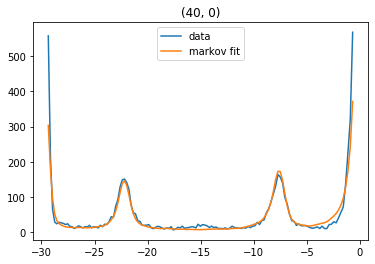

(40, 1)


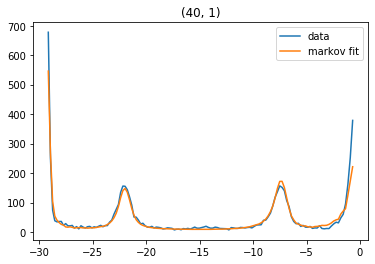

(40, 2)


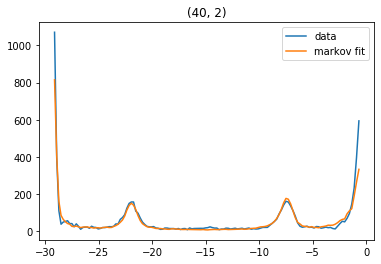

(40, 3)


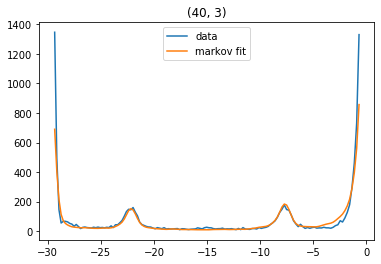

(40, 4)


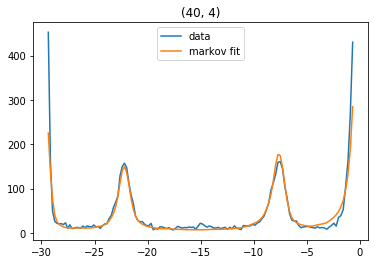

(40, 5)


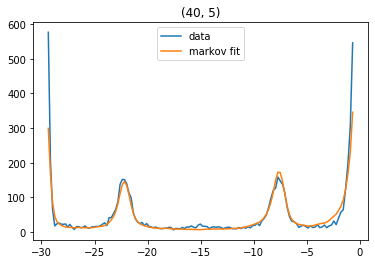

In [7]:
Plot_Elements_Spectrum(matrix, ((40,0), (40,1), (40, 2), (40,3), (40, 4), (40,5)), fit = 'markov')

(33, 32)


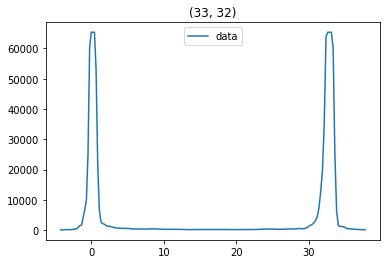

(33, 53)


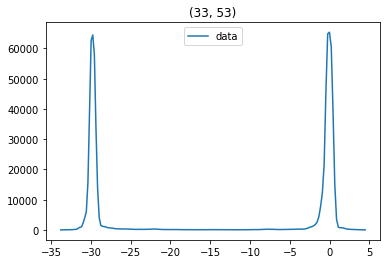

(33, 54)


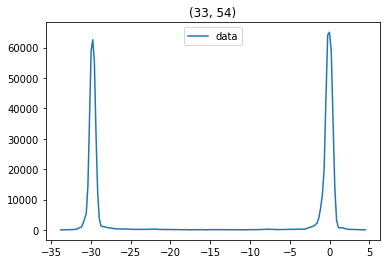

(48, 66)


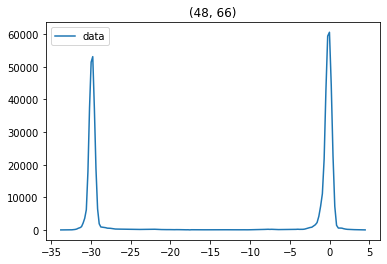

(54, 22)


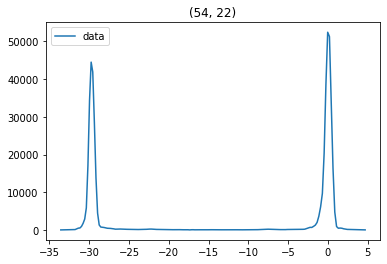

(68, 25)


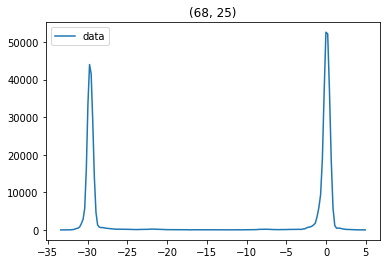

(68, 26)


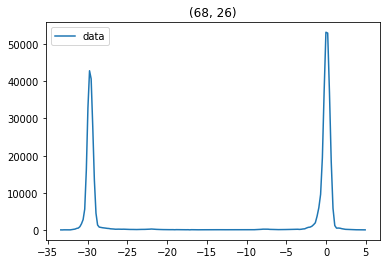

(68, 58)


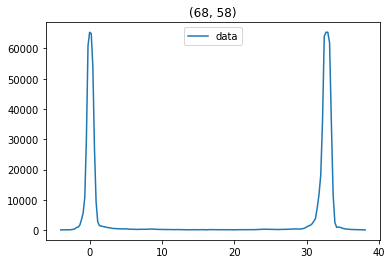

(70, 20)


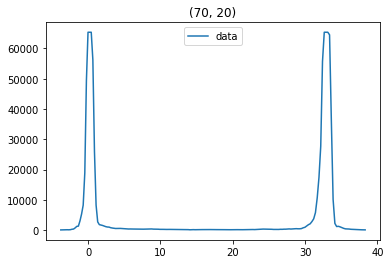

(70, 23)


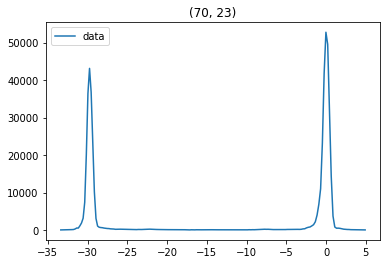

(70, 24)


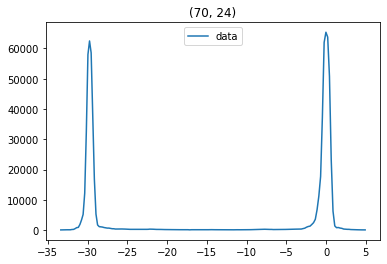

(70, 48)


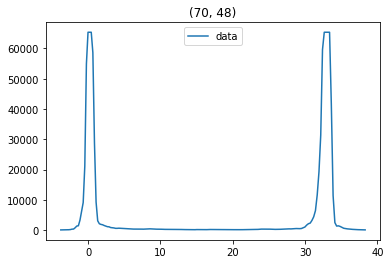

(70, 60)


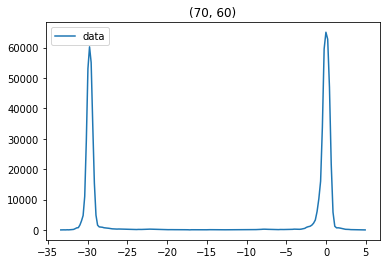

(70, 62)


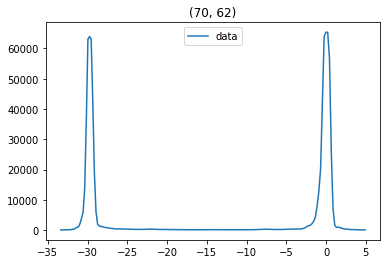

(70, 71)


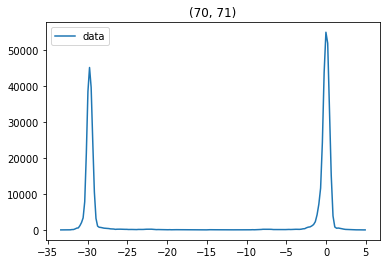

(71, 60)


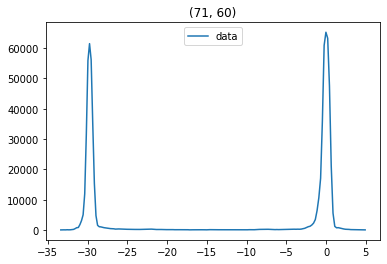

(71, 61)


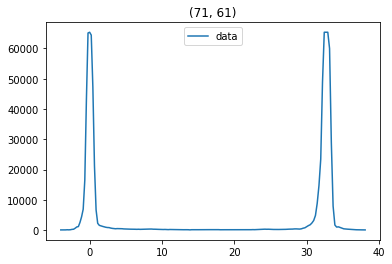

(72, 24)


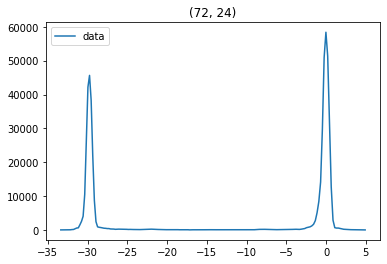

(74, 24)


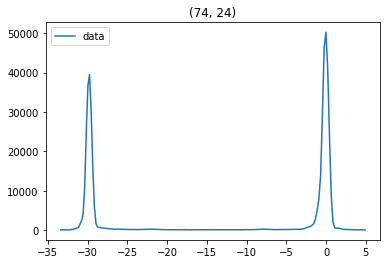

(74, 56)


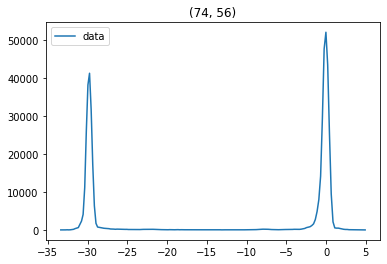

(80, 49)


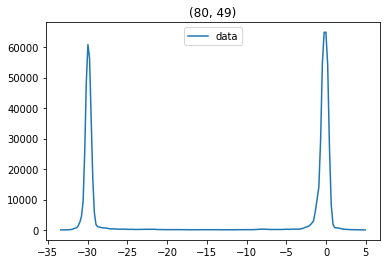

(80, 59)


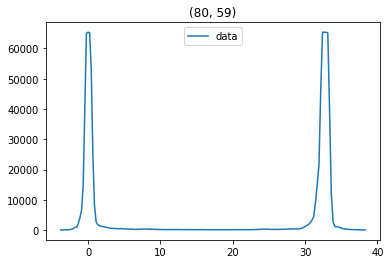

(80, 61)


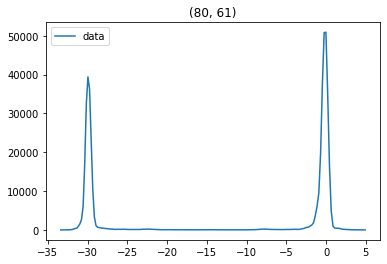

(81, 20)


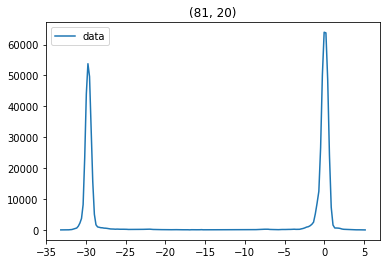

(81, 22)


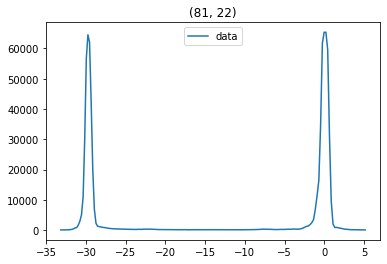

(81, 23)


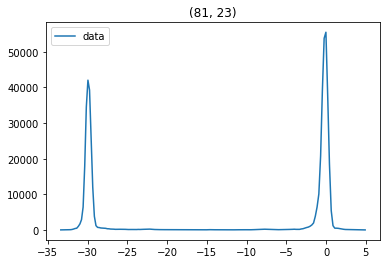

(81, 24)


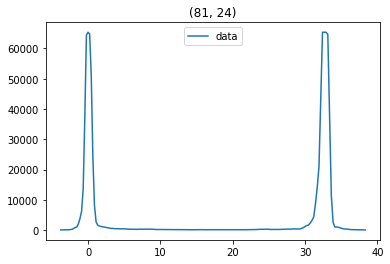

(81, 25)


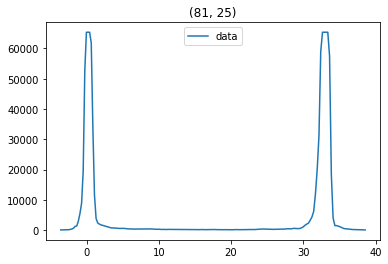

(81, 26)


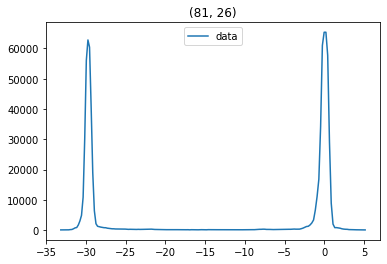

(81, 27)


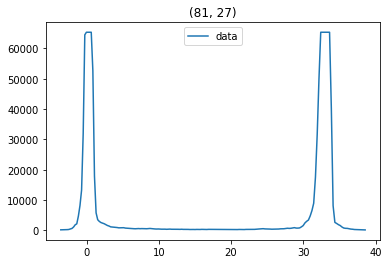

(81, 30)


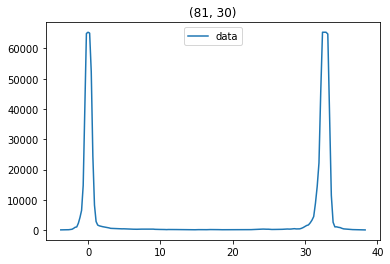

(81, 35)


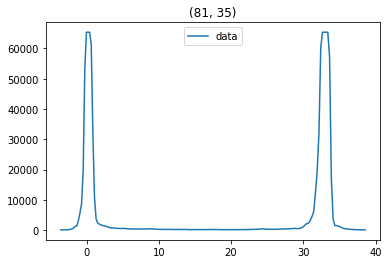

(81, 37)


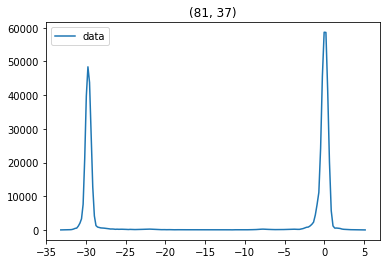

(81, 39)


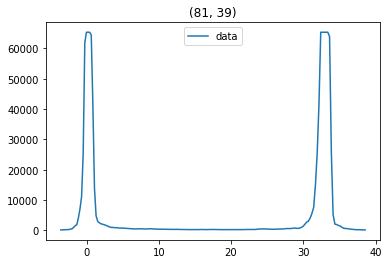

(81, 44)


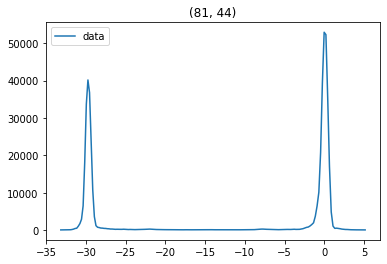

(81, 49)


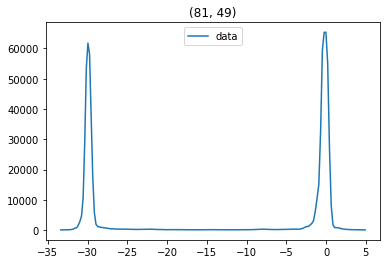

(81, 50)


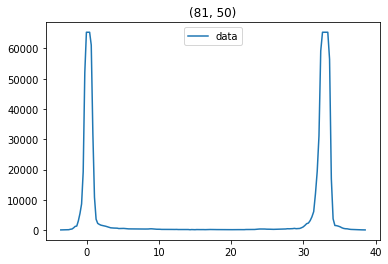

(81, 51)


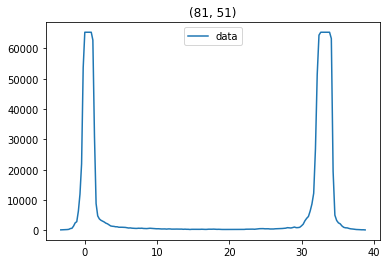

(81, 52)


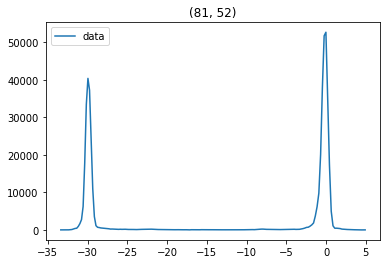

(81, 53)


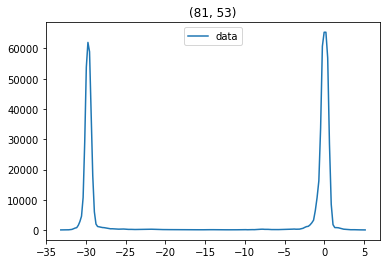

(81, 57)


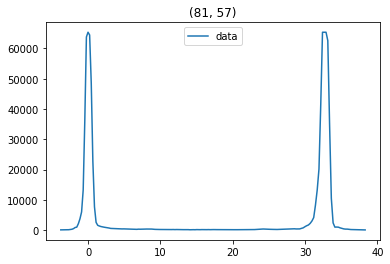

(82, 20)


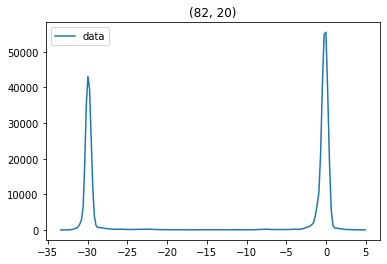

(82, 22)


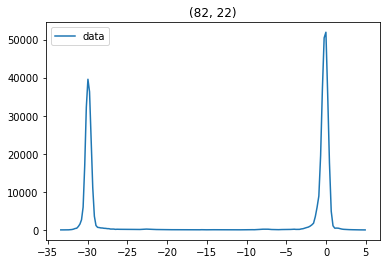

(82, 23)


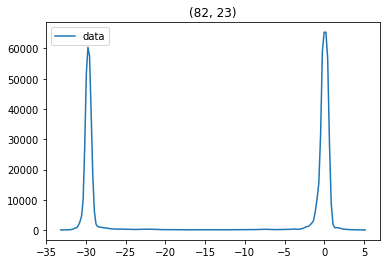

(82, 30)


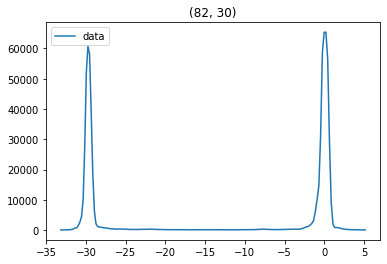

(83, 44)


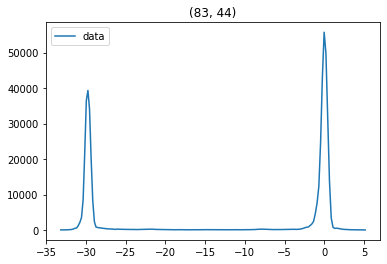

(84, 42)


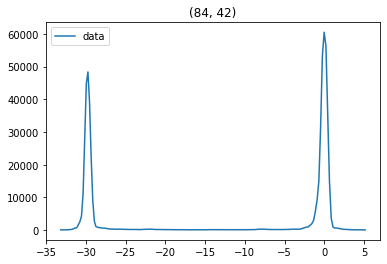

(84, 44)


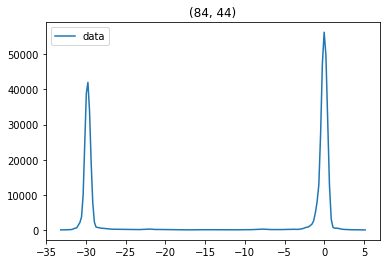

(84, 48)


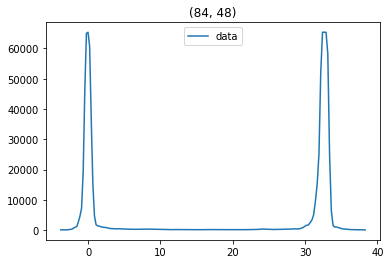

(84, 54)


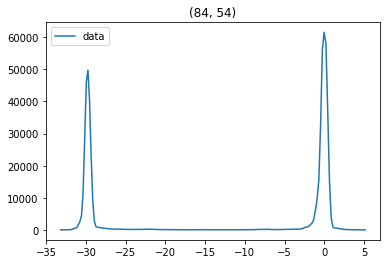

(85, 47)


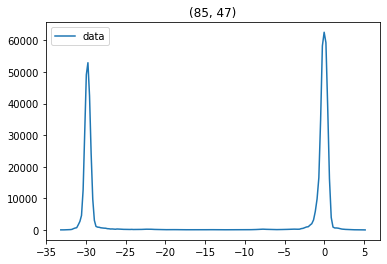

(85, 48)


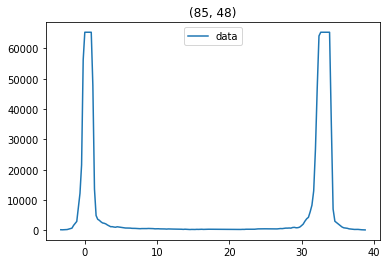

(85, 49)


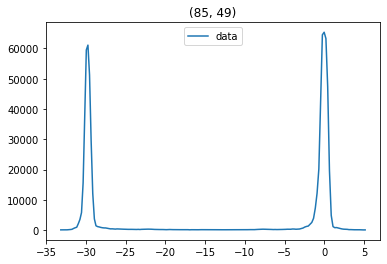

(85, 50)


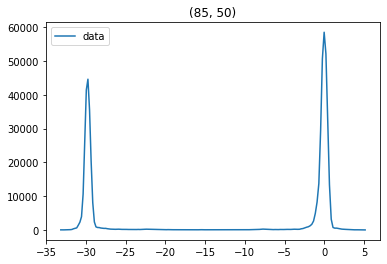

(91, 45)


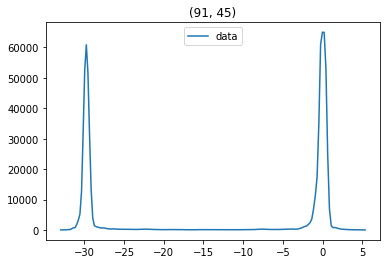

(93, 27)


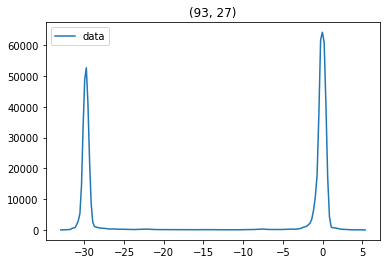

(93, 32)


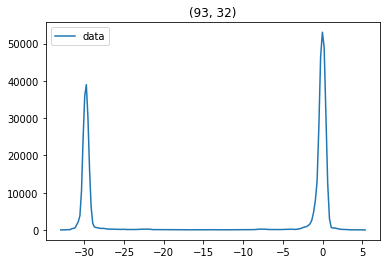

(95, 38)


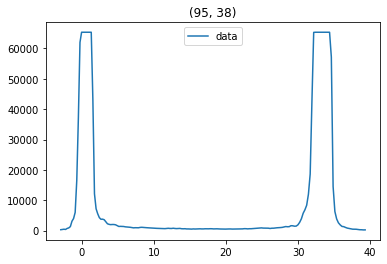

(96, 23)


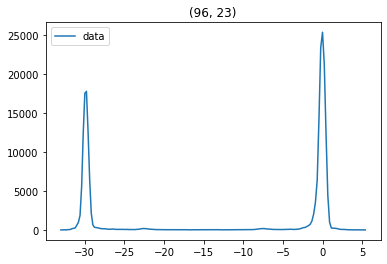

(96, 30)


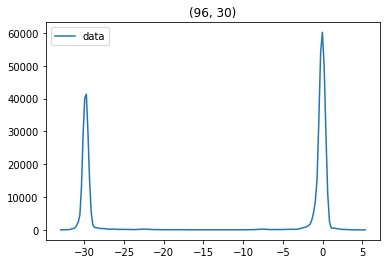

(96, 34)


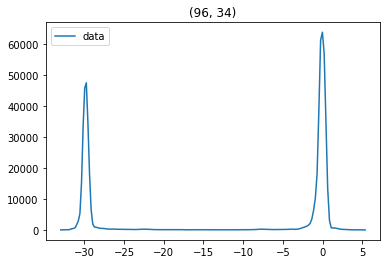

(96, 36)


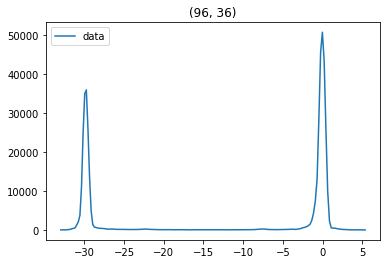

(96, 38)


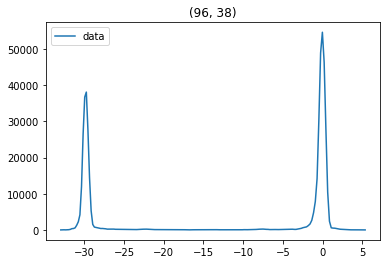

(96, 39)


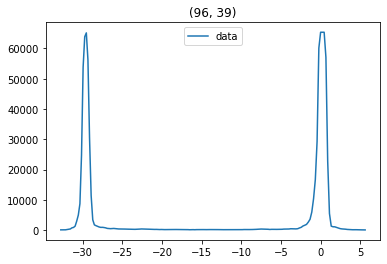

(96, 40)


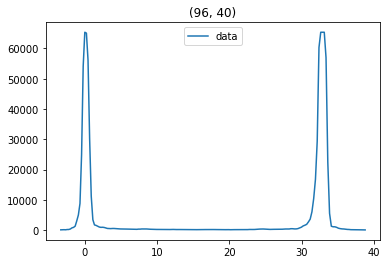

(98, 44)


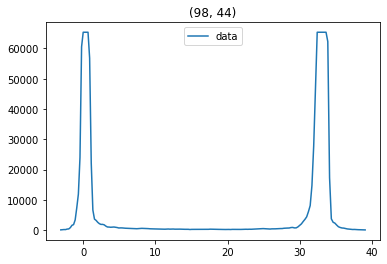

(98, 52)


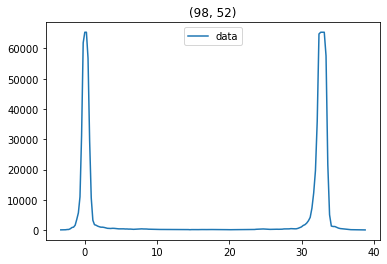

In [10]:
Plot_Elements_Spectrum(matrix, excluded)

In [ ]:
len(excluded)